# Exploring and comparing the EC tower data with gridded datasets

* Per-site, facet plots:
    * For common in-situ and gridded variables: Ta, VPD, rainfall, incoming solar
        * Correlation matrices
        * 1:1 plots with r2 and MAE
        * Distributions
* Group all sites together
    * Distributions 

     

## Load modules

In [2]:
import os
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sb
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [3]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 14})

## Analysis parameters

In [4]:
path = '/g/data/os22/chad_tmp/NEE_modelling/results/training_data/'

First, stitch all the training data together add site name as field 

In [5]:
dffs = []
for i in os.listdir(path):
    if 'csv' in i:
        df = pd.read_csv(path+i,index_col='time', parse_dates=True)
        df['site_name'] = i[0:3]
        dffs.append(df)

df = pd.concat(dffs)

##  1:1 point-to-pixel comparisons

Function for producing nice 1:1 plots grouped by a variable in the dataframe

In [6]:
def one_to_one(df, x, y, groupby_var, title, col_wrap, adjust, output_path=None, ax_lim=(None,None)):
    df = df[[x, y, groupby_var]].dropna()
    fg = sb.FacetGrid(df, col=groupby_var, col_wrap=col_wrap, margin_titles=True)
    fg.map(sb.scatterplot,x,y,color="#338844", edgecolor="white", s=50, lw=1, alpha=0.5)
    fg.map(sb.regplot, x, y, scatter=False, color='m')
    fg.map(sb.regplot, x, x, scatter=False, color='black', line_kws={'linestyle':'dashed'})
    fg.set(ylim=ax_lim, xlim=ax_lim)
    fg.set_axis_labels("In-situ", "Gridded")

    def annotate(data,**kws):
        r, p = sp.stats.pearsonr(data[x], data[y])
        mae = mean_absolute_error(data[x], data[y])
        ax = plt.gca()
        ax.text(.05, .8, 'r={:.3f}'.format(r),
                transform=ax.transAxes)
        ax.text(.05, .7, 'mae={:.3g}'.format(mae),
                transform=ax.transAxes)

    fg.map_dataframe(annotate)
    fg.fig.subplots_adjust(top=adjust)
    fg.fig.suptitle(title)
    #plt.savefig(output_path);

In [7]:
df.columns

Index(['NEE_SOLO_EC', 'GPP_SOLO_EC', 'ER_SOLO_EC', 'ET_EC', 'Ta_EC', 'Sws_EC',
       'RH_EC', 'Precip_EC', 'Fn_EC', 'Fe_EC', 'Fh_EC', 'Fsd_EC', 'Fld_EC',
       'CO2_EC', 'VPD_EC', 'LAI_anom_RS', 'kNDVI_anom_RS', 'FPAR_RS', 'LST_RS',
       'tree_cover_RS', 'nontree_cover_RS', 'nonveg_cover_RS', 'LST-Tair_RS',
       'TWI_RS', 'NDWI_RS', 'rain_anom_RS', 'rain_cml3_anom_RS',
       'rain_cml6_anom_RS', 'rain_cml12_anom_RS', 'srad_anom_RS', 'vpd_RS',
       'tavg_anom_RS', 'SOC_RS', 'CO2_RS', 'x_coord', 'y_coord',
       'Fluxcom_RS-Meteo_NEE', 'Fluxcom_RS_NEE', 'ThisStudy_NEE', 'Cable_NEE',
       'Fluxcom_RS_GPP', 'Fluxcom_RS-meteo_GPP', 'ThisStudy_GPP', 'Cable_GPP',
       'MODIS_GPP', 'GOSIF_GPP', 'site_name'],
      dtype='object')

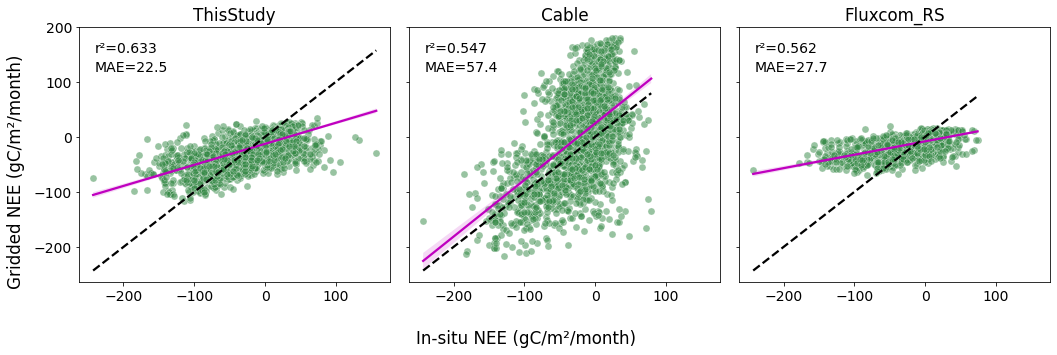

In [18]:
fg, ax = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)
for i, j in zip(['ThisStudy_NEE', 'Cable_NEE', 'Fluxcom_RS_NEE'], range(0, 3)):
    dfs = df[[i, 'NEE_SOLO_EC']].dropna()
    x='NEE_SOLO_EC'
    y=i
    sb.scatterplot(data=dfs,x=x,y=y,color="#338844", edgecolor="white", s=50, lw=1, alpha=0.5, ax=ax[j])
    sb.regplot(data=dfs, x=x, y=y, scatter=False, color='m', ax=ax[j])
    sb.regplot(data=dfs, x=x, y=x, scatter=False, color='black', line_kws={'linestyle':'dashed'}, ax=ax[j])
    r, p = sp.stats.pearsonr(dfs[x], dfs[y])
    mae = mean_absolute_error(dfs[x], dfs[y])
    ax[j].set_xlabel('')
    ax[j].set_ylabel('')
    ax[j].set_title(i[:-4])
    ax[j].text(.05, .9, 'r\N{SUPERSCRIPT TWO}={:.3f}'.format(r),
            transform=ax[j].transAxes)
    ax[j].text(.05, .825, 'MAE={:.3g}'.format(mae),
            transform=ax[j].transAxes)

# fg.text(0.5, 0.04, 'In-situ NEE (gC/m\N{SUPERSCRIPT TWO}/month)', ha='center')
fg.supxlabel('In-situ NEE (gC/m\N{SUPERSCRIPT TWO}/month)')
fg.supylabel('Gridded NEE (gC/m\N{SUPERSCRIPT TWO}/month)')
plt.tight_layout()
plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/one_to_one/NEE_intercomparison.png');

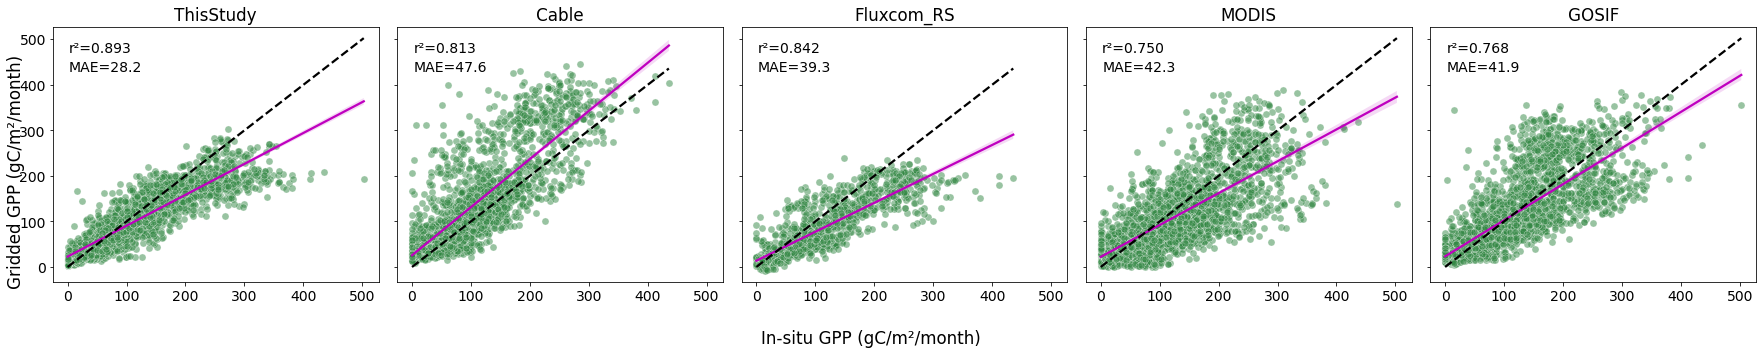

In [19]:
fg, ax = plt.subplots(1,5, figsize=(25,5), sharey=True, sharex=True)
for i, j in zip(['ThisStudy_GPP', 'Cable_GPP', 'Fluxcom_RS_GPP', 'MODIS_GPP', 'GOSIF_GPP'], range(0, 5)):
    dfs = df[[i, 'GPP_SOLO_EC']].dropna()
    x='GPP_SOLO_EC'
    y=i
    sb.scatterplot(data=dfs,x=x,y=y,color="#338844", edgecolor="white", s=50, lw=1, alpha=0.5, ax=ax[j])
    sb.regplot(data=dfs, x=x, y=y, scatter=False, color='m', ax=ax[j])
    sb.regplot(data=dfs, x=x, y=x, scatter=False, color='black', line_kws={'linestyle':'dashed'}, ax=ax[j])
    r, p = sp.stats.pearsonr(dfs[x], dfs[y])
    mae = mean_absolute_error(dfs[x], dfs[y])
    ax[j].set_xlabel('')
    ax[j].set_ylabel('')
    ax[j].set_title(i[:-4])
    ax[j].text(.05, .9, 'r\N{SUPERSCRIPT TWO}={:.3f}'.format(r),
            transform=ax[j].transAxes)
    ax[j].text(.05, .825, 'MAE={:.3g}'.format(mae),
            transform=ax[j].transAxes)

# fg.text(0.5, 0.04, 'In-situ NEE (gC/m\N{SUPERSCRIPT TWO}/month)', ha='center')
fg.supxlabel('In-situ GPP (gC/m\N{SUPERSCRIPT TWO}/month)')
fg.supylabel('Gridded GPP (gC/m\N{SUPERSCRIPT TWO}/month)')
plt.tight_layout()
plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/one_to_one/GPP_intercomparison.png');

Site specific 1:1 plots

In [ ]:
one_to_one(df,
           x='',
           y='NEE_SOLO_EC',
           groupby_var='site_name',
           title=f'NEE', #W/m\N{SUPERSCRIPT TWO}
           col_wrap=5,
           # ax_lim=(5,35),
           adjust=0.935, 
           #output_path='/g/data/os22/chad_tmp/NEE_modelling/results/figs/one_to_one/Ta_site_name.png'
          )


Group by simplified landcover class

In [ ]:
one_to_one(df,
           x='Ta_EC',
           y='Ta_RS',
           groupby_var='PFT_RS',
           title=f'Air Temperature (C)', #W/m\N{SUPERSCRIPT TWO},
           ax_lim=(5,35),
           col_wrap=4,
           adjust=0.8,
           #output_path='/g/data/os22/chad_tmp/NEE_modelling/results/figs/one_to_one/Ta_PFT.png'
          )

---

## Compare insitu distributions (EC data) with remotely sensed distributions (Aus-wide)

### First prepare the EC data

In [ ]:
ec_vars = df.filter(regex='EC').drop(['NEE_SOLO_EC', 'GPP_SOLO_EC', 'ER_SOLO_EC', 'RH_EC', 'Sws_EC', 'Fe_EC', 'Fn_EC', 'Fh_EC', 'Fld_EC'],
                                     axis=1).rename({'Ta_EC':'Ta', 'Precip_EC':'precip','Fsd_EC':'Fsd','VPD_EC':'VPD'},axis=1).reset_index(drop=True)
ec_vars.head()
ec_vars['Measurement'] = 'EC'

### Gather the gridded data over all of Aus

Extract a random subsample of data to keep compute down

In [ ]:
f = 1
t1,t2 = '2020', '2021'
#temperature
print('Sampling Ta')
ta_rs = xr.open_dataset('/g/data/os22/chad_tmp/NEE_modelling/data/AWRA/tavg_monthly_1991_2021.nc')
ta_rs = ta_rs.rename({'temp_avg_month':'Ta'})
ta_rs = ta_rs.sel(time=slice(t1, t2))
ta_rs = ta_rs.Ta.to_dataframe().reset_index(
        level=[1, 2]).drop(['latitude', 'longitude'], axis=1).sample(frac=f).reset_index(drop=True)
ta_rs['Measurement'] = 'RS'

# shrtwave radiation
print('Sampling solar radiation')
solar = xr.open_dataset('/g/data/os22/chad_tmp/NEE_modelling/data/AWRA/solar_monthly_wm2_2000_2021.nc')
solar = solar.rename({'solar_exposure_day':'Fsd'})
solar = solar.sel(time=slice(t1, t2))
solar = solar.Fsd.to_dataframe().reset_index(
        level=[1, 2]).drop(['latitude', 'longitude', 'spatial_ref'], axis=1).sample(frac=f).reset_index(drop=True)
solar['Measurement'] = 'RS'

#rainfall
print('Sampling Rainfall')
rain = xr.open_dataset('/g/data/os22/chad_tmp/NEE_modelling/data/chirps_aus_monthly_1991_2021.nc')
rain = rain.sel(time=slice(t1,t2))
rain = rain.precip.to_dataframe().reset_index(
        level=[1, 2]).drop(['latitude', 'longitude', 'spatial_ref'], axis=1).sample(frac=f).reset_index(drop=True)
rain['Measurement'] = 'RS'

#vapour pressure deficit
print('Sampling VPD')
vpd = xr.open_dataset('/g/data/os22/chad_tmp/NEE_modelling/data/AWRA/vpd_monthly_2000_2021.nc')
vpd = vpd.sel(time=slice(t1, t2))
vpd = vpd.VPD.to_dataframe().reset_index(
        level=[1, 2]).drop(['latitude', 'longitude', 'spatial_ref'], axis=1).sample(frac=f).reset_index(drop=True)
vpd['Measurement'] = 'RS'

### Join EC and remote sensing data, then wrangle into individual dataframes

In [ ]:
df = pd.concat([ec_vars, ta_rs, solar, rain, vpd])

ta = df[['Ta', 'Measurement']].melt(id_vars=['Measurement'], var_name='Ta').dropna().reset_index(drop=True)
vpd = df[['VPD', 'Measurement']].melt(id_vars=['Measurement'], var_name='VPD').dropna().reset_index(drop=True)
precip = df[['precip', 'Measurement']].melt(id_vars=['Measurement'], var_name='precip').dropna().reset_index(drop=True)
precip = precip[precip.value < 300]
solar = df[['Fsd', 'Measurement']].melt(id_vars=['Measurement'], var_name='Fsd').dropna().reset_index(drop=True)

### Create violin plots

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16,7), sharey=False, sharex=False)
sb.violinplot(x="Ta", y="value", hue="Measurement", ax=ax[0], data=ta, palette="muted", split=True, inner="quartile", scale='width')
sb.violinplot(x="VPD", y="value", hue="Measurement", ax=ax[1], data=vpd, palette="muted", split=True,inner="quartile")
sb.violinplot(x="precip", y="value", hue="Measurement", ax=ax[2], data=precip, palette="muted", split=True, inner="quartile")
sb.violinplot(x="Fsd", y="value", hue="Measurement", ax=ax[3], data=solar, palette="muted", split=True, inner="quartile");

degree_sign = u'\N{DEGREE SIGN}'
units = [degree_sign+'C', 'Pa', 'mm', f'W/m\N{SUPERSCRIPT TWO}']

for i,j in zip(ax, units):
    i.set_ylabel(j)
    i.set_xlabel('')
plt.suptitle('Eddy covariance vs gridded data')
plt.tight_layout()
plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/ec_vs_rs_violinplots.png');

---
## Correlation matrices

In [ ]:
def corr_matrix_ec(df, groupby_var, suffix, drop, col_wrap, output_path, height=4, aspect=1):
    df = df.filter(regex=r'(_EC|site)').drop(drop,axis=1)
    df = df.sort_values('site_name')
    df.columns = df.columns.str.rstrip(suffix)
    df = df.rename({'NEE_SOLO':'NEE', 'GPP_SOLO':'GPP', 'ER_SOLO':'ER'}, axis=1)
    fg = sb.FacetGrid(df, col=groupby_var, col_wrap=col_wrap, sharex=False, height=height, aspect=aspect)
    fg.map_dataframe(lambda data, color: sb.heatmap(data.corr(),vmin=-1.0, vmax=1.0,annot=True, cbar=False,  cmap="bwr_r", mask=np.triu(np.ones_like(data.corr(), dtype=bool))))
    plt.savefig(output_path);
    
corr_matrix_ec(df=df,       
           suffix='_EC',
           drop=['Fe_EC','Fh_EC','Fld_EC', 'Sws_EC', 'RH_EC','Fn_EC'],
           groupby_var='site_name',
           col_wrap=6,
           output_path='/g/data/os22/chad_tmp/NEE_modelling/results/figs/corr_ec.png'
           )

In [ ]:
def corr_matrix_rs(df, groupby_var, suffix, drop, col_wrap, output_path, height=4, aspect=1):
    df = df.set_index(['site_name'], append=True)
    fluxes = df[['NEE_SOLO_EC', 'GPP_SOLO_EC','ER_SOLO_EC']]
    df = df.filter(regex=r'(_RS|site)').drop(drop,axis=1)
    df = df[['Ta_RS','precip_RS','solar_RS', 'VPD_RS']] # reorder to match EC order
    df = fluxes.join(df)
    df = df.reset_index(level=[1])
    df = df.sort_values('site_name')
    df.columns = df.columns.str.rstrip(suffix)
    df = df.rename({'NEE_SOLO_EC':'NEE', 'GPP_SOLO_EC':'GPP', 'ER_SOLO_EC':'ER', 'solar':'Fsd'}, axis=1)
    fg = sb.FacetGrid(df, col=groupby_var, col_wrap=col_wrap, sharex=False, height=height, aspect=aspect)
    fg.map_dataframe(lambda data, color: sb.heatmap(data.corr(), vmin=-1.0, vmax=1.0, annot=True, cbar=False,  cmap="bwr_r", mask=np.triu(np.ones_like(data.corr(), dtype=bool))))
    plt.savefig(output_path);
    
corr_matrix_rs(df=df,       
           suffix='_RS',
           drop=['lai_RS', 'LST_RS', 'Fpar_RS', 'soil_moisture_RS', 'LST-Tair_RS','spei_RS','precip_cml_RS', 'IGBP_class_RS'],
           groupby_var='site_name',
           col_wrap=6,
           output_path='/g/data/os22/chad_tmp/NEE_modelling/results/figs/corr_rs.png'
           )

In [ ]:
corr = df.filter(regex='EC').drop(['Fe_EC','Fh_EC','Fld_EC', 'Sws_EC', 'RH_EC','Fn_EC'],axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax=plt.subplots(1,1, figsize=(8,8))
sb.heatmap(corr, cmap="bwr_r", annot=True, ax=ax, cbar=False, mask=mask)
plt.title('Correlations between CO2 fluxes and in-situ climate variables');

In [ ]:
fluxes = df[['NEE_SOLO_EC', 'GPP_SOLO_EC','ER_SOLO_EC']]
rs = df.filter(regex='RS')

In [ ]:
rs.columns

In [ ]:
corr = fluxes.join(rs).drop(['lai_RS', 'LST_RS', 'Fpar_RS', 'soil_moisture_RS', 'LST-Tair_RS','spei_RS','precip_cml_RS'],axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax=plt.subplots(1,1, figsize=(10,10))
sb.heatmap(corr, cmap="bwr_r", annot=True, ax=ax, cbar=False, mask=mask)
plt.title('Correlations between CO2 fluxes and gridded climate variables');